# Python Programming 3

## Plots in Python

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


A simple plot

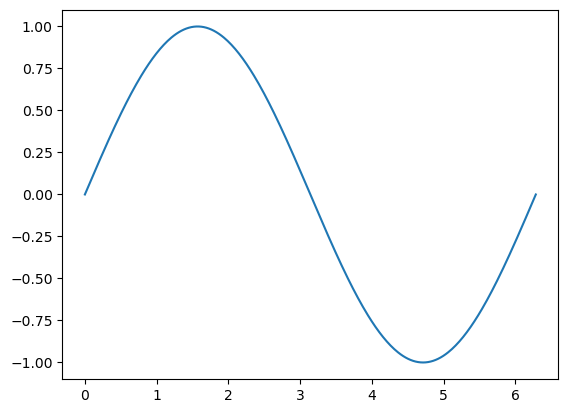

In [35]:
x = np.linspace(0,2*np.pi,361)
fx = np.sin(x)
plt.plot(x,fx)
plt.show()

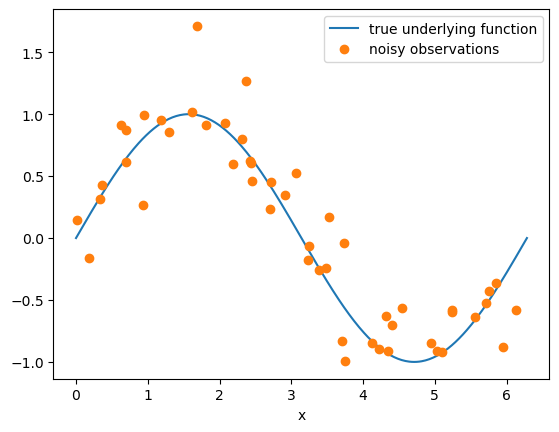

In [36]:
rng = np.random.default_rng() # make a RNG

u = rng.random(50) * 2 * np.pi
v = np.sin(u) + rng.normal(0,1/4,50)

plt.plot(x,fx,label= "true underlying function")
plt.plot(u,v,'o',label = "noisy observations")
plt.xlabel('x')
plt.legend()
plt.show()

Another way to set up a figure and a set of axes and build a plot and then show it.

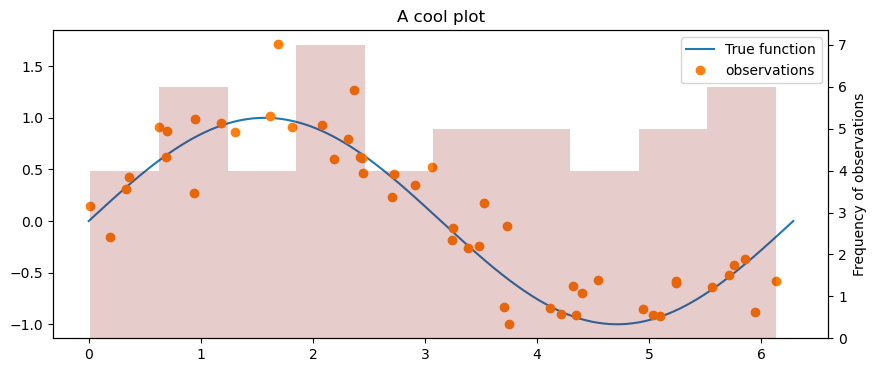

In [37]:
fig, ax = plt.subplots( figsize = (10,4))

ax.plot(x,fx, label = "True function")
ax.plot(u,v,'o', label = "observations")
ax.set_title("A cool plot")
ax.legend()

ax2 = ax.twinx()
ax2.hist(u,color= (0.545,0,0,.2))
ax2.set_ylabel('Frequency of observations')
plt.show()

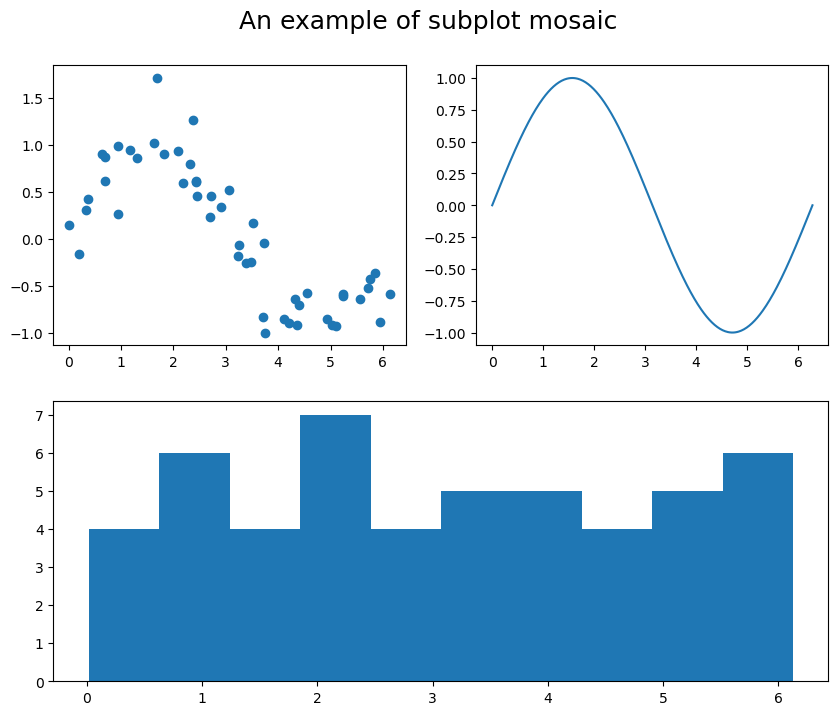

In [38]:
fig, axs = plt.subplot_mosaic([['A','B'],['Bottom','Bottom']], figsize=(10,8) )

axs['A'].plot(u,v,'o')
axs['B'].plot(x,fx)
axs['Bottom'].hist(u)

fig.suptitle('An example of subplot mosaic', fontsize = 18, y = .95)

plt.show()

## Defining functions in Python

In [39]:
def gc_content(seq):
    """Return GC content fraction of a DNA sequence string."""
    return (seq.count("G") + seq.count("C")) / len(seq)

seq = "ATGCGCATTA"
gc_content(seq)

0.4

A function with two arguments 

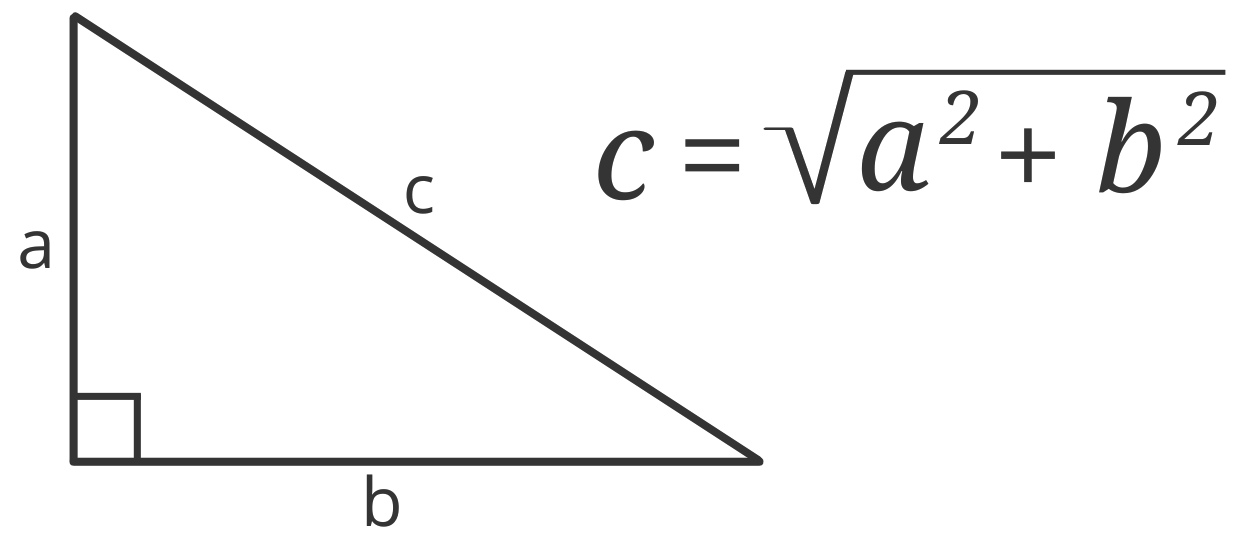

In [59]:
from IPython.display import Image
Image("hypotenuse2.png", width=300)

In [40]:
def hyp(a,b):

    csq = a**2 + b**2
    c = np.sqrt(csq)
    return c

print(hyp(3,4))

5.0


What if we want a function to return more than one output??

In [45]:
def sigmoid_with_derivative(x):
    """
    Compute the sigmoid activation and its derivative.
    
    Returns:
        a  = sigmoid(x)
        da = derivative of sigmoid(x)
    """
    a = 1 / (1 + np.exp(-x))
    da = a * (1 - a)  # derivative using a common identity
    return a, da

# Example usage
x = np.array([-2, 0, 2])
a, da = sigmoid_with_derivative(x)

print("Input:", x)
print("Sigmoid:", a)
print("Derivative:", da)


Input: [-2  0  2]
Sigmoid: [0.11920292 0.5        0.88079708]
Derivative: [0.10499359 0.25       0.10499359]


In [44]:
def linear_forward(x, w, b):
    """
    Compute the output of a fully-connected (dense) layer.
    
    Returns:
        out   = x @ w + b
        cache = (x, w, b)  # stored for backprop
    """
    out = x @ w + b
    cache = (x, w, b)
    return out, cache

# Example usage
x = np.array([[1, 2]])
w = np.array([[0.1, 0.2],
              [0.3, 0.4]])
b = np.array([0.5, 0.6])

out, cache = linear_forward(x, w, b)

print("Output:", out)
print("Cache for backprop:", cache)


Output: [[1.2 1.6]]
Cache for backprop: (array([[1, 2]]), array([[0.1, 0.2],
       [0.3, 0.4]]), array([0.5, 0.6]))


A function which take some values by default:

In [46]:
def logistic(x,a=0,b=1):

    l = a + b * x
    val = np.exp(l) / (1 + np.exp(l))
    return val

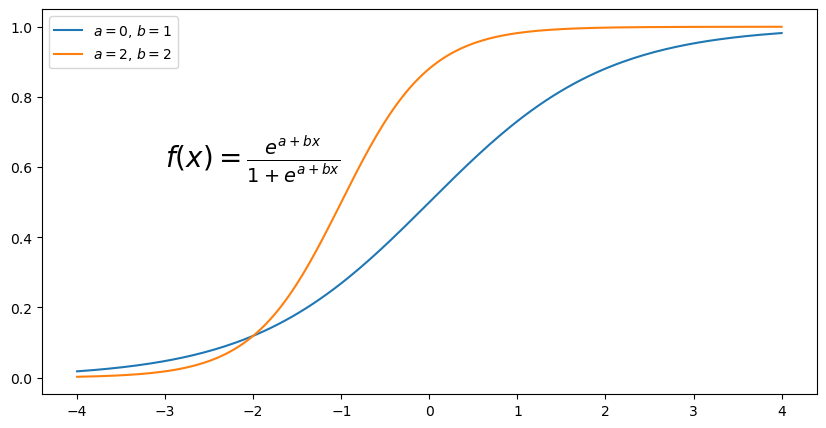

In [50]:
x = np.linspace(-4,4,201)
fx1 = logistic(x)
fx2 = logistic(x,a = 2,b=2)

plt.rcParams['text.usetex'] # this allows you to use LaTex code in your plot labels

fig, ax = plt.subplots(figsize = (10,5))

ax.plot(x,fx1, label = "$a = 0$, $b = 1$")
ax.plot(x,fx2, label = "$a = 2$, $b = 2$")

ax.text(-3, .6, "$f(x) = \\frac{e^{a + b x}}{1 + e^{a + bx} }$", fontsize=20)

ax.legend()
plt.show()

The softmax function 

In [54]:
def softmax(x):
    """
    Compute the softmax of vector x in a numerically stable way.
    """
    # subtract max for numerical stability
    shifted_x = x - np.max(x)
    exp_x = np.exp(shifted_x)
    return exp_x / np.sum(exp_x)

x = np.array([2.0, 1.0, 0.1])
s = softmax(x)

print("softmax:", s)
print("sum:", np.sum(s))



softmax: [0.65900114 0.24243297 0.09856589]
sum: 1.0


## A cool 3d plot

In [56]:
def bivn(x,y,rho=0):

    r = 1 - rho**2
    z = x**2 + y**2 - 2*rho*x*y
    f = 1/(2 * np.pi) * 1/np.sqrt(r) * np.exp( - z / (2 * r))
    return f

bivn(1,1/2,-1/4)

np.float64(0.07385823208730814)

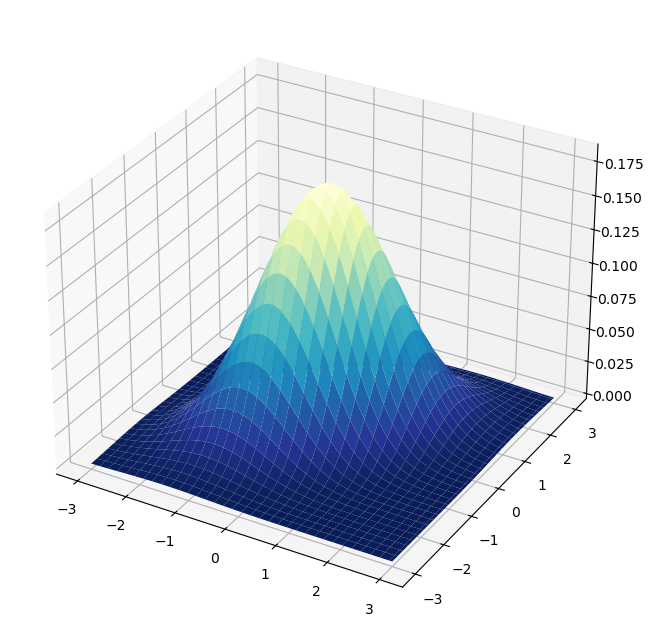

In [57]:
gs = 101 # this is the "grid size"
grid = np.linspace(-3,3,gs)
X, Y = np.meshgrid(grid,grid)
F = bivn(X,Y,rho=1/2)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,F, cmap = plt.cm.YlGnBu_r)

plt.show()